# Regression Predict Student Solution

© Explore Data Science Academy

---
### Honour Code

I {**YOUR NAME, YOUR SURNAME**}, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

### Predict Overview: Spain Electricity Shortfall Challenge

The government of Spain is considering an expansion of it's renewable energy resource infrastructure investments. As such, they require information on the trends and patterns of the countries renewable sources and fossil fuel energy generation. Your company has been awarded the contract to:

- 1. analyse the supplied data;
- 2. identify potential errors in the data and clean the existing data set;
- 3. determine if additional features can be added to enrich the data set;
- 4. build a model that is capable of forecasting the three hourly demand shortfalls;
- 5. evaluate the accuracy of the best machine learning model;
- 6. determine what features were most important in the model’s prediction decision, and
- 7. explain the inner working of the model to a non-technical audience.

Formally the problem statement was given to you, the senior data scientist, by your manager via email reads as follow:

> In this project you are tasked to model the shortfall between the energy generated by means of fossil fuels and various renewable sources - for the country of Spain. The daily shortfall, which will be referred to as the target variable, will be modelled as a function of various city-specific weather features such as `pressure`, `wind speed`, `humidity`, etc. As with all data science projects, the provided features are rarely adequate predictors of the target variable. As such, you are required to perform feature engineering to ensure that you will be able to accurately model Spain's three hourly shortfalls.
 
On top of this, she has provided you with a starter notebook containing vague explanations of what the main outcomes are. 

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
| In this section you are required to import, and briefly discuss, the libraries that will be used throughout your analysis and modelling. |

---

In [64]:
# Libraries for data loading, data manipulation and data visulisation

import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

from matplotlib import rc

import seaborn as sns

from statsmodels.graphics.correlation import plot_corr

from scipy.stats import skew

#ignoring warnings

import warnings

warnings.simplefilter(action='ignore')

import datetime
# Libraries for data preparation and model building

from sklearn import metrics

from sklearn.metrics import mean_squared_error

from sklearn.tree import DecisionTreeRegressor

from sklearn.compose import ColumnTransformer

from sklearn.ensemble import RandomForestRegressor

from sklearn.linear_model import Lasso, Ridge, LinearRegression

from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV

from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, PolynomialFeatures

from sklearn.linear_model import Lasso, Ridge, LinearRegression

# saving my model

import pickle

pd.set_option('display.max_rows', None)

pd.set_option('display.max_columns', None)

sns.set(rc={'figure.figsize':(12,8)})

<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |
| In this section you are required to load the data from the `df_train` file into a DataFrame. |

---

In [65]:
# Loading the 'df_train' data
df = pd.read_csv("df_train.csv")
df.head()

,Unnamed: 0,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,Barcelona_wind_deg,Madrid_clouds_all,Seville_wind_speed,Barcelona_rain_1h,Seville_pressure,Seville_rain_1h,Bilbao_snow_3h,Barcelona_pressure,Seville_rain_3h,Madrid_rain_1h,Barcelona_rain_3h,Valencia_snow_3h,Madrid_weather_id,Barcelona_weather_id,Bilbao_pressure,Seville_weather_id,Valencia_pressure,Seville_temp_max,Madrid_pressure,Valencia_temp_max,Valencia_temp,Bilbao_weather_id,Seville_temp,Valencia_humidity,Valencia_temp_min,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
0,0,2015-01-01 03:00:00,0.666667,level_5,0.0,0.666667,74.333333,64.000000,0.0,1.000000,0.0,223.333333,6.333333,42.666667,0.0,3.333333,0.0,sp25,0.0,0.0,1036.333333,0.0,0.0,0.0,0.0,800.0,800.0,1035.000000,800.0,1002.666667,274.254667,971.333333,269.888000,269.888000,800.0,274.254667,75.666667,269.888000,281.013000,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667
1,1,2015-01-01 06:00:00,0.333333,level_10,0.0,1.666667,78.333333,64.666667,0.0,1.000000,0.0,221.000000,4.000000,139.000000,0.0,3.333333,0.0,sp25,0.0,0.0,1037.333333,0.0,0.0,0.0,0.0,800.0,800.0,1035.666667,800.0,1004.333333,274.945000,972.666667,271.728333,271.728333,800.0,274.945000,71.000000,271.728333,280.561667,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667
2,2,2015-01-01 09:00:00,1.000000,level_9,0.0,1.000000,71.333333,64.333333,0.0,1.000000,0.0,214.333333,2.000000,326.000000,0.0,2.666667,0.0,sp25,0.0,0.0,1038.000000,0.0,0.0,0.0,0.0,800.0,800.0,1036.000000,800.0,1005.333333,278.792000,974.000000,278.008667,278.008667,800.0,278.792000,65.666667,278.008667,281.583667,272.708667,281.583667,275.027229,275.027229,281.583667,275.027229,278.792000,272.708667,272.708667,4274.666667
3,3,2015-01-01 12:00:00,1.000000,level_8,0.0,1.000000,65.333333,56.333333,0.0,1.000000,0.0,199.666667,2.333333,273.000000,0.0,4.000000,0.0,sp25,0.0,0.0,1037.000000,0.0,0.0,0.0,0.0,800.0,800.0,1036.000000,800.0,1009.000000,285.394000,994.666667,284.899552,284.899552,800.0,285.394000,54.000000,284.899552,283.434104,281.895219,283.434104,281.135063,281.135063,283.434104,281.135063,285.394000,281.895219,281.895219,5075.666667
4,4,2015-01-01 15:00:00,1.000000,level_7,0.0,1.000000,59.000000,57.000000,2.0,0.333333,0.0,185.000000,4.333333,260.000000,0.0,3.000000,0.0,sp25,0.0,0.0,1035.000000,0.0,0.0,0.0,0.0,800.0,800.0,1035.333333,800.0,NaN,285.513719,1035.333333,283.015115,283.015115,800.0,285.513719,58.333333,283.015115,284.213167,280.678437,284.213167,282.252063,282.252063,284.213167,282.252063,285.513719,280.678437,280.678437,6620.666667


<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Exploratory data analysis ⚡ |
| :--------------------------- |
| In this section, you are required to perform an in-depth analysis of all the variables in the DataFrame. |

---


In [66]:
#From the shape it is observed that the DataFrame has 8763 rows and 49 columns

df.shape

(8763, 49)

In [67]:
#The DataFrame has 1 column that has Null values 
#3 columns with 'object' data type 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 49 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            8763 non-null   int64  
 1   time                  8763 non-null   object 
 2   Madrid_wind_speed     8763 non-null   float64
 3   Valencia_wind_deg     8763 non-null   object 
 4   Bilbao_rain_1h        8763 non-null   float64
 5   Valencia_wind_speed   8763 non-null   float64
 6   Seville_humidity      8763 non-null   float64
 7   Madrid_humidity       8763 non-null   float64
 8   Bilbao_clouds_all     8763 non-null   float64
 9   Bilbao_wind_speed     8763 non-null   float64
 10  Seville_clouds_all    8763 non-null   float64
 11  Bilbao_wind_deg       8763 non-null   float64
 12  Barcelona_wind_speed  8763 non-null   float64
 13  Barcelona_wind_deg    8763 non-null   float64
 14  Madrid_clouds_all     8763 non-null   float64
 15  Seville_wind_speed   

In [68]:
# look at data statistics

df.describe()

,Unnamed: 0,Madrid_wind_speed,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,Barcelona_wind_deg,Madrid_clouds_all,Seville_wind_speed,Barcelona_rain_1h,Seville_rain_1h,Bilbao_snow_3h,Barcelona_pressure,Seville_rain_3h,Madrid_rain_1h,Barcelona_rain_3h,Valencia_snow_3h,Madrid_weather_id,Barcelona_weather_id,Bilbao_pressure,Seville_weather_id,Valencia_pressure,Seville_temp_max,Madrid_pressure,Valencia_temp_max,Valencia_temp,Bilbao_weather_id,Seville_temp,Valencia_humidity,Valencia_temp_min,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
count,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8.763000e+03,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,6695.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000
mean,4381.000000,2.425729,0.135753,2.586272,62.658793,57.414717,43.469132,1.850356,13.714748,158.957511,2.870497,190.544848,19.473392,2.425045,0.128906,0.039439,0.031912,1.377965e+03,0.000243,0.037818,0.000439,0.000205,773.527594,765.979687,1017.739549,774.658818,1012.051407,297.479527,1010.316920,291.337233,290.592152,724.722362,293.978903,65.247727,289.867648,291.157644,289.540309,289.855459,285.017973,286.422929,288.447422,287.966027,291.633356,288.419439,287.202203,10673.857612
std,2529.804538,1.850371,0.374901,2.411190,22.621226,24.335396,32.551044,1.695888,24.272482,102.056299,1.792197,89.077337,28.053660,1.672895,0.634730,0.175857,0.557264,1.407314e+04,0.003660,0.152639,0.003994,0.011866,77.313315,88.142235,10.046124,71.940009,9.506214,8.875812,22.198555,7.565692,7.162274,115.846537,7.920986,19.262322,6.907402,7.273538,9.752047,6.528111,6.705672,6.818682,6.102593,7.105590,8.178220,9.346796,9.206237,5218.046404
min,0.000000,0.000000,0.000000,0.000000,8.333333,6.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.706667e+02,0.000000,0.000000,0.000000,0.000000,211.000000,200.666667,971.333333,200.000000,972.666667,272.063000,927.666667,269.888000,269.888000,207.333333,272.063000,10.333333,269.888000,272.150000,264.983333,270.816667,264.483333,267.483333,269.483333,269.063000,270.150000,264.983333,264.983333,-6618.000000
25%,2190.500000,1.000000,0.000000,1.000000,44.333333,36.333333,10.000000,0.666667,0.000000,73.333333,1.666667,118.166667,0.000000,1.000000,0.000000,0.000000,0.000000,1.014000e+03,0.000000,0.000000,0.000000,0.000000,800.000000,800.000000,1013.000000,800.000000,1010.333333,291.312750,1012.333333,285.550167,285.150000,700.333333,288.282917,51.333333,284.783333,285.483333,282.150000,284.973443,280.085167,281.374167,284.150000,282.836776,285.816667,281.404281,280.299167,7390.333333
50%,4381.000000,2.000000,0.000000,1.666667,65.666667,58.000000,45.000000,1.000000,0.000000,147.000000,2.666667,200.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.018000e+03,0.000000,0.000000,0.000000,0.000000,800.000000,800.333333,1019.000000,800.000000,1015.000000,297.101667,1017.333333,291.037000,290.176667,800.000000,293.323333,67.000000,289.550000,290.150000,288.116177,289.416667,284.816667,286.158333,288.150000,287.630000,290.816667,287.053333,286.083333,11114.666667
75%,6571.500000,3.333333,0.100000,3.666667,82.000000,78.666667,75.000000,2.666667,20.000000,234.000000,4.000000,260.000000,33.333333,3.333333,0.000000,0.000000,0.000000,1.022000e+03,0.000000,0.000000,0.000000,0.000000,800.666667,801.000000,1024.000000,800.000000,1018.000000,304.150000,1022.00

In [69]:
#Checking for nulls values
#Valencia_presure has 2068 null values

df.isnull().sum()

Unnamed: 0                 0
time                       0
Madrid_wind_speed          0
Valencia_wind_deg          0
Bilbao_rain_1h             0
Valencia_wind_speed        0
Seville_humidity           0
Madrid_humidity            0
Bilbao_clouds_all          0
Bilbao_wind_speed          0
Seville_clouds_all         0
Bilbao_wind_deg            0
Barcelona_wind_speed       0
Barcelona_wind_deg         0
Madrid_clouds_all          0
Seville_wind_speed         0
Barcelona_rain_1h          0
Seville_pressure           0
Seville_rain_1h            0
Bilbao_snow_3h             0
Barcelona_pressure         0
Seville_rain_3h            0
Madrid_rain_1h             0
Barcelona_rain_3h          0
Valencia_snow_3h           0
Madrid_weather_id          0
Barcelona_weather_id       0
Bilbao_pressure            0
Seville_weather_id         0
Valencia_pressure       2068
Seville_temp_max           0
Madrid_pressure            0
Valencia_temp_max          0
Valencia_temp              0
Bilbao_weather

In [70]:
#Filing in the NAN with mean() as it was observed above that Valencia_pressure has null values

df['Valencia_pressure'].fillna(df['Valencia_pressure'].mean(), inplace=True)

In [71]:
# remove missing values/ features
# Droping 'Unnamed' column as it does not indicate what data represent
# Droping columns endswith '1hr' because majority of our data was  captured at 3hr intervals
# Droping columns that endswith 'id' because the weather conditions of a specific city at a specific time is already defined by other columns 

#df.drop('time', axis=1, inplace=True)
df.drop('Unnamed: 0', axis=1, inplace=True)
df.drop(df[df.columns[df.columns.str.endswith('1h')]], axis=1, inplace=True)
df.drop(df[df.columns[df.columns.str.endswith('id')]], axis=1, inplace=True)

In [72]:
#Changing Dtypes of 'time' from object to 'datetime64'
#Changing Dtypes of 'Valencia_wind_deg', 'Seville_pressure' from object to 'category'

df['time'] = df['time'].astype('category')
#import datetime
#df['time'] = pd.to_datetime(df['time'])
#df['date'] = df['time'].dt.date
df['Valencia_wind_deg'] = df['Valencia_wind_deg'].astype('category')
df['Seville_pressure'] = df['Seville_pressure'].astype('category')

In [73]:
#Encoding 'Valencia_wind_deg', 'Seville_pressure' from 'category' to numeric values using 'cat.codes'

df['time'] = df['time'].cat.codes
df['Valencia_wind_deg'] = df['Valencia_wind_deg'].cat.codes
df['Seville_pressure'] = df['Seville_pressure'].cat.codes

In [74]:
#Changing Dtypes of 'Valencia_wind_deg', 'Seville_pressure' from 'int32' to 'float64'

df['time'] = df['time'].astype('float64')
df['Valencia_wind_deg'] = df['Valencia_wind_deg'].astype('float64')
df['Seville_pressure'] = df['Seville_pressure'].astype('float64')

In [75]:
#It can be observed from the data below that all the non of the 40 columns have null values and they now all have numeric values 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 40 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   time                  8763 non-null   float64
 1   Madrid_wind_speed     8763 non-null   float64
 2   Valencia_wind_deg     8763 non-null   float64
 3   Valencia_wind_speed   8763 non-null   float64
 4   Seville_humidity      8763 non-null   float64
 5   Madrid_humidity       8763 non-null   float64
 6   Bilbao_clouds_all     8763 non-null   float64
 7   Bilbao_wind_speed     8763 non-null   float64
 8   Seville_clouds_all    8763 non-null   float64
 9   Bilbao_wind_deg       8763 non-null   float64
 10  Barcelona_wind_speed  8763 non-null   float64
 11  Barcelona_wind_deg    8763 non-null   float64
 12  Madrid_clouds_all     8763 non-null   float64
 13  Seville_wind_speed    8763 non-null   float64
 14  Seville_pressure      8763 non-null   float64
 15  Bilbao_snow_3h       

In [76]:
#Majority of the factors contains less outliers in the data 
#kurtosis is <3

df.kurtosis()

time                      -1.200000
Madrid_wind_speed          2.036462
Valencia_wind_deg         -1.192548
Valencia_wind_speed       35.645426
Seville_humidity          -1.017983
Madrid_humidity           -1.167537
Bilbao_clouds_all         -1.533417
Bilbao_wind_speed          3.631565
Seville_clouds_all         2.155921
Bilbao_wind_deg           -1.083530
Barcelona_wind_speed       1.493635
Barcelona_wind_deg        -0.959160
Madrid_clouds_all          0.142079
Seville_wind_speed         1.398580
Seville_pressure          -1.155787
Bilbao_snow_3h           806.128471
Barcelona_pressure      3687.564230
Seville_rain_3h          413.136592
Barcelona_rain_3h        187.800460
Valencia_snow_3h        4089.323165
Bilbao_pressure            1.825323
Valencia_pressure          3.821219
Seville_temp_max          -0.515989
Madrid_pressure            2.216199
Valencia_temp_max         -0.613755
Valencia_temp             -0.643793
Seville_temp              -0.504132
Valencia_humidity         -0

In [77]:
#features  = ['Madrid_temp', "Bilbao_temp", 'Barcelona_temp', "Valencia_temp", "Valencia_humidity", "Madrid_pressure", "Seville_temp", "Valencia_pressure", "Bilbao_pressure", "Valencia_snow_3h", "Seville_rain_3h", "Barcelona_rain_3h", "Barcelona_pressure", "Bilbao_snow_3h", "Madrid_clouds_all", "Barcelona_wind_deg", "Bilbao_clouds_all", "Madrid_humidity", "Seville_humidity", "Valencia_wind_speed", "Madrid_wind_speed", "Valencia_wind_deg", "Bilbao_snow_3h"]
#df[features].hist(figsize=(20,20));

In [78]:
#df[features].plot(kind='density', subplots=True, layout=(5, 5), sharex=False, figsize=(20, 20));

In [79]:
#Temperature plots. show that the temperature in Spain cities is generally centered around the range of 260-310 degree
#Whereas humidity is centered around 0-100 across all cities with a humidity measure
#Rain acrros the cities in spain is centered around 0 
#Clouds_all shows a varying shape in the density plots across all cities 
#Spain cities generally do not snow , the density plots are centered around 0 for snow_3hrs
#We can conclude that the sourcees of renewable resources will most likely be affected by temperature, humidity and clouds all

In [80]:
#Moving our dependent feature to the end of the DataFrame 

column_names = [column for column in df.columns if column!= 'load_shortfall_3h'] + ['load_shortfall_3h']
df=df.reindex(columns=column_names)

<AxesSubplot:>

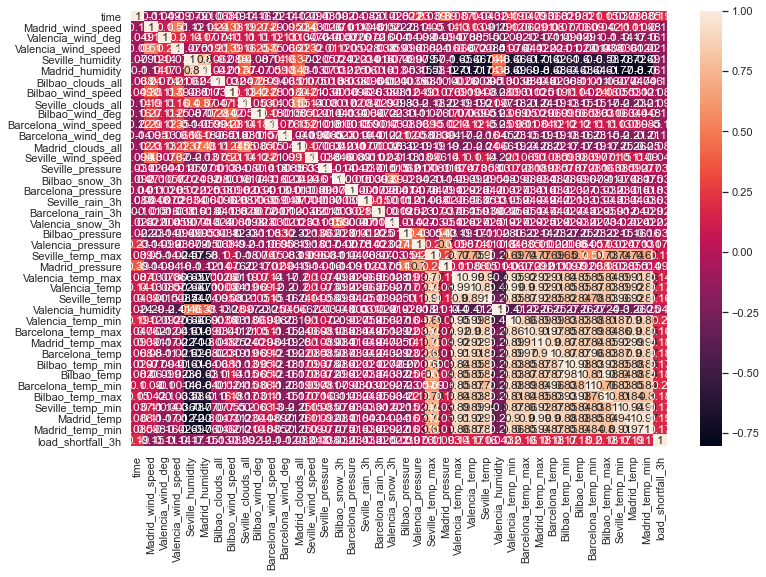

In [81]:
#Investigating correlation between our features
#Moving our dependent feature to the end of the DataFrame 

column_names = [column for column in df.columns if column!= 'load_shortfall_3h'] + ['load_shortfall_3h']
df=df.reindex(columns=column_names)
correlation = df.corr()
sns.heatmap(correlation, xticklabels=correlation.columns, yticklabels=correlation.columns, annot=True)

In [82]:
# Selecting highly correlated features 
# This will remove the first feature that is correlated with any other feature

def correlation(data, threshold):
    column_correlation = set()  # Set of all the names of correlated columns
    correlation_matrix = data.corr()
    for i in range(len(correlation_matrix.columns)):
        for j in range(i):
            if abs(correlation_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                column_name = correlation_matrix.columns[i]  # getting the name of column
                column_correlation.add(column_name)
    return column_correlation

In [83]:
#Setting our threshold to 0.8 and finding the number of features that are highly correlated

correlated_features = correlation(df, 0.8)
len(set(correlated_features))

13

In [84]:
#List of highly correlated features 

column_drop = correlated_features
column_drop

{'Barcelona_temp',
 'Barcelona_temp_max',
 'Barcelona_temp_min',
 'Bilbao_temp',
 'Bilbao_temp_max',
 'Bilbao_temp_min',
 'Madrid_temp',
 'Madrid_temp_max',
 'Madrid_temp_min',
 'Seville_temp',
 'Seville_temp_min',
 'Valencia_temp',
 'Valencia_temp_min'}

In [85]:
#Droping features that are highly correlated

df = df.drop(column_drop,axis=1)

In [86]:
df.head()

,time,Madrid_wind_speed,Valencia_wind_deg,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,Barcelona_wind_deg,Madrid_clouds_all,Seville_wind_speed,Seville_pressure,Bilbao_snow_3h,Barcelona_pressure,Seville_rain_3h,Barcelona_rain_3h,Valencia_snow_3h,Bilbao_pressure,Valencia_pressure,Seville_temp_max,Madrid_pressure,Valencia_temp_max,Valencia_humidity,load_shortfall_3h
0,0.0,0.666667,5.0,0.666667,74.333333,64.000000,0.0,1.000000,0.0,223.333333,6.333333,42.666667,0.0,3.333333,17.0,0.0,1036.333333,0.0,0.0,0.0,1035.000000,1002.666667,274.254667,971.333333,269.888000,75.666667,6715.666667
1,1.0,0.333333,1.0,1.666667,78.333333,64.666667,0.0,1.000000,0.0,221.000000,4.000000,139.000000,0.0,3.333333,17.0,0.0,1037.333333,0.0,0.0,0.0,1035.666667,1004.333333,274.945000,972.666667,271.728333,71.000000,4171.666667
2,2.0,1.000000,9.0,1.000000,71.333333,64.333333,0.0,1.000000,0.0,214.333333,2.000000,326.000000,0.0,2.666667,17.0,0.0,1038.000000,0.0,0.0,0.0,1036.000000,1005.333333,278.792000,974.000000,278.008667,65.666667,4274.666667
3,3.0,1.000000,8.0,1.000000,65.333333,56.333333,0.0,1.000000,0.0,199.666667,2.333333,273.000000,0.0,4.000000,17.0,0.0,1037.000000,0.0,0.0,0.0,1036.000000,1009.000000,285.394000,994.666667,284.899552,54.000000,5075.666667
4,4.0,1.000000,7.0,1.000000,59.000000,57.000000,2.0,0.333333,0.0,185.000000,4.333333,260.000000,0.0,3.000000,17.0,0.0,1035.000000,0.0,0.0,0.0,1035.333333,1012.051407,285.513719,1035.333333,283.015115,58.333333,6620.666667


In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   time                  8763 non-null   float64
 1   Madrid_wind_speed     8763 non-null   float64
 2   Valencia_wind_deg     8763 non-null   float64
 3   Valencia_wind_speed   8763 non-null   float64
 4   Seville_humidity      8763 non-null   float64
 5   Madrid_humidity       8763 non-null   float64
 6   Bilbao_clouds_all     8763 non-null   float64
 7   Bilbao_wind_speed     8763 non-null   float64
 8   Seville_clouds_all    8763 non-null   float64
 9   Bilbao_wind_deg       8763 non-null   float64
 10  Barcelona_wind_speed  8763 non-null   float64
 11  Barcelona_wind_deg    8763 non-null   float64
 12  Madrid_clouds_all     8763 non-null   float64
 13  Seville_wind_speed    8763 non-null   float64
 14  Seville_pressure      8763 non-null   float64
 15  Bilbao_snow_3h       

In [88]:
# Import the split function from sklearn
from sklearn.model_selection import train_test_split

In [89]:
# Split data into predictors and response
X = df.drop('load_shortfall_3h', axis=1)
y = df['load_shortfall_3h']

In [90]:
X.head()

,time,Madrid_wind_speed,Valencia_wind_deg,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,Barcelona_wind_deg,Madrid_clouds_all,Seville_wind_speed,Seville_pressure,Bilbao_snow_3h,Barcelona_pressure,Seville_rain_3h,Barcelona_rain_3h,Valencia_snow_3h,Bilbao_pressure,Valencia_pressure,Seville_temp_max,Madrid_pressure,Valencia_temp_max,Valencia_humidity
0,0.0,0.666667,5.0,0.666667,74.333333,64.000000,0.0,1.000000,0.0,223.333333,6.333333,42.666667,0.0,3.333333,17.0,0.0,1036.333333,0.0,0.0,0.0,1035.000000,1002.666667,274.254667,971.333333,269.888000,75.666667
1,1.0,0.333333,1.0,1.666667,78.333333,64.666667,0.0,1.000000,0.0,221.000000,4.000000,139.000000,0.0,3.333333,17.0,0.0,1037.333333,0.0,0.0,0.0,1035.666667,1004.333333,274.945000,972.666667,271.728333,71.000000
2,2.0,1.000000,9.0,1.000000,71.333333,64.333333,0.0,1.000000,0.0,214.333333,2.000000,326.000000,0.0,2.666667,17.0,0.0,1038.000000,0.0,0.0,0.0,1036.000000,1005.333333,278.792000,974.000000,278.008667,65.666667
3,3.0,1.000000,8.0,1.000000,65.333333,56.333333,0.0,1.000000,0.0,199.666667,2.333333,273.000000,0.0,4.000000,17.0,0.0,1037.000000,0.0,0.0,0.0,1036.000000,1009.000000,285.394000,994.666667,284.899552,54.000000
4,4.0,1.000000,7.0,1.000000,59.000000,57.000000,2.0,0.333333,0.0,185.000000,4.333333,260.000000,0.0,3.000000,17.0,0.0,1035.000000,0.0,0.0,0.0,1035.333333,1012.051407,285.513719,1035.333333,283.015115,58.333333


In [91]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)#random_state=50)

In [92]:
# Import the linear regression module
from sklearn.linear_model import LinearRegression

In [93]:
# Declare the model object
lm = LinearRegression()

In [94]:
# Fit the model to the training data (also known as training the model)
lm.fit(X_train, y_train)

LinearRegression()

In [95]:
# Extract the intercept, or y-cut, of our linear model
a = float(lm.intercept_)

In [96]:
# Extract the coefficient, or gradient, of our linear model
b = lm.coef_

In [97]:
print("Slope:\t\t", b)
print("Intercept:\t", float(a))

Slope:		 [ 2.77574743e-01 -2.54678005e+02 -5.42897406e+01 -9.71943641e+01
 -3.99245138e+01 -3.24177617e+00 -1.08506715e+01 -5.72735342e+01
  6.49460117e+00 -2.77275388e+00 -6.19440093e+01 -3.74552856e+00
  1.06994211e+01 -2.44856454e+01  1.02634029e+01  4.56945682e+01
 -4.10165902e-03 -3.01505374e+04 -6.86467835e+03 -5.26510097e+03
  2.27807159e+01  1.58417540e+01 -5.01780420e+01 -7.18498636e+00
  1.00354954e+02  2.33670540e+01]
Intercept:	 -32982.842286226696


In [98]:
# Generate the values that fall along our regression line
gen_y = lm.predict(X_train)

# Plot the results
#plt.scatter(X_train, y_train, color='green')  # Plot the training data in green
#plt.plot(X_train, gen_y, color='red')  # Plot the line connecting the generated y-values
#plt.show()

In [99]:
from sklearn import metrics

In [100]:
print("Training:")
# Calculate the mean-squared-error
print('MSE:', metrics.mean_squared_error(y_train, gen_y))
# Calculate the R-squared metric
print('R_squared:', metrics.r2_score(y_train, gen_y))

Training:
MSE: 24094006.633087113
R_squared: 0.11787082875047639


In [101]:
# Generate values of y from x, using the linear model
gen_y_test = lm.predict(X_test)

# Plot the results
#plt.scatter(X_test, y_test, color='darkblue')  # Plot the testing data in blue
#plt.plot(X_test, gen_y_test, color='red')  # Plot the line connecting the generated y-values in red
#plt.show()

In [102]:
print("Testing:")
print('MSE:', metrics.mean_squared_error(y_test, gen_y_test))
print('R_squared:', metrics.r2_score(y_test, gen_y_test))

Testing:
MSE: 23771327.458084006
R_squared: 0.11534512381648798


In [140]:
# Loading the 'df_test' data
df1 = pd.read_csv("df_test.csv").copy()

#Filing in the NAN with mean() as it was observed above that Valencia_pressure has null values

df1['Valencia_pressure'].fillna(df1['Valencia_pressure'].mean(), inplace=True)

# remove missing values/ features
# Droping 'Unnamed' column as it does not indicate what data represent
# Droping columns endswith '1hr' because majority of our data was  captured at 3hr intervals
# Droping columns that endswith 'id' because the weather conditions of a specific city at a specific time is already defined by other columns 

#df1.drop('time', axis=1, inplace=True)
df1.drop('Unnamed: 0', axis=1, inplace=True)
df1.drop(df[df.columns[df.columns.str.endswith('1h')]], axis=1, inplace=True)
df1.drop(df[df.columns[df.columns.str.endswith('id')]], axis=1, inplace=True)

#Changing Dtypes of 'time' from object to 'datetime64'
#Changing Dtypes of 'Valencia_wind_deg', 'Seville_pressure' from object to 'category'

df1['time'] = df1['time'].astype('category')
#df['time'] = df['time'].astype('datetime64')
#df1['date'] = df1['time'].dt.date
df1['Valencia_wind_deg'] = df1['Valencia_wind_deg'].astype('category')
df1['Seville_pressure'] = df1['Seville_pressure'].astype('category')

#Encoding 'Valencia_wind_deg', 'Seville_pressure' from 'category' to numeric values using 'cat.codes'

df1['time'] = df1['time'].cat.codes
df1['Valencia_wind_deg'] = df1['Valencia_wind_deg'].cat.codes
df1['Seville_pressure'] = df1['Seville_pressure'].cat.codes

#Changing Dtypes of 'Valencia_wind_deg', 'Seville_pressure' from 'int32' to 'float64'

df1['Valencia_wind_deg'] = df1['Valencia_wind_deg'].astype('float64')
df1['Seville_pressure'] = df1['Seville_pressure'].astype('float64')

#Droping features that are highly correlated
df1.drop(df[df.columns[df.columns.str.endswith('temp')]], axis=1, inplace=True)
df1.drop(df[df.columns[df.columns.str.endswith('min')]], axis=1, inplace=True)
df1.drop('Barcelona_temp_max', axis=1, inplace=True)
df1.drop('Bilbao_temp_max', axis=1, inplace=True)
df1.drop('Madrid_temp_max', axis=1, inplace=True)


In [141]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2920 entries, 0 to 2919
Data columns (total 44 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   time                  2920 non-null   int16  
 1   Madrid_wind_speed     2920 non-null   float64
 2   Valencia_wind_deg     2920 non-null   float64
 3   Bilbao_rain_1h        2920 non-null   float64
 4   Valencia_wind_speed   2920 non-null   float64
 5   Seville_humidity      2920 non-null   float64
 6   Madrid_humidity       2920 non-null   float64
 7   Bilbao_clouds_all     2920 non-null   float64
 8   Bilbao_wind_speed     2920 non-null   float64
 9   Seville_clouds_all    2920 non-null   float64
 10  Bilbao_wind_deg       2920 non-null   float64
 11  Barcelona_wind_speed  2920 non-null   float64
 12  Barcelona_wind_deg    2920 non-null   float64
 13  Madrid_clouds_all     2920 non-null   float64
 14  Seville_wind_speed    2920 non-null   float64
 15  Barcelona_rain_1h    

In [142]:
#y_hat = model.predict(X_test)

y_hat = fitted.predict(X_test) #predicted values

pre_dict = {'time':df_test[df_test.columns[0]],'load_shortfall_3h': y_hat} # dictionary containing predicted values

predict_ed = pd.DataFrame(pre_dict) # dataframe with the date and load_shortfall_3h

predict_ed.to_csv('Team_1.csv',index = False)

NameError: name 'fitted' is not defined

<a id="four"></a>
## 4. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Data engineering ⚡ |
| :--------------------------- |
| In this section you are required to: clean the dataset, and possibly create new features - as identified in the EDA phase. |

---

<a id="five"></a>
## 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Modelling ⚡ |
| :--------------------------- |
| In this section, you are required to create one or more regression models that are able to accurately predict the thee hour load shortfall. |

---

In [ ]:
# split data

In [ ]:
# create targets and features dataset

In [ ]:
# create one or more ML models

In [ ]:
# evaluate one or more ML models

<a id="six"></a>
## 6. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model performance ⚡ |
| :--------------------------- |
| In this section you are required to compare the relative performance of the various trained ML models on a holdout dataset and comment on what model is the best and why. |

---

In [ ]:
# Compare model performance

In [ ]:
# Choose best model and motivate why it is the best choice

<a id="seven"></a>
## 7. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model explanation ⚡ |
| :--------------------------- |
| In this section, you are required to discuss how the best performing model works in a simple way so that both technical and non-technical stakeholders can grasp the intuition behind the model's inner workings. |

---

In [ ]:
# discuss chosen methods logic